# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

In [2]:
!pip install numpy
!pip install pandas

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

Import the core data science libraries:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [22]:
import os
print(os.getcwd())
data_path = '/Users/sufiyahathena/Desktop/8-pandas-exploration-sufiyahathena/data/HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity_20240428.csv'
df = pd.read_csv(data_path, na_values="NA")

/Users/sufiyahathena/Desktop/8-pandas-exploration-sufiyahathena


## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [13]:
df.sample(5)

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
1938,2011,NaN,Port Richmond,Female,Hispanic,0,0,0,0,0,0
1838,2010,NaN,Canarsie - Flatlands,Female,Unknown,0,0,0,0,0,0
8101,2020,Staten\nIsland,Willowbrook,Female,Asian/Pacific\nIslander,1,12.1,0,0,0,0
3123,2016,Brooklyn,Bedford Stuyvesant -\nCrown Heights,Male,Latino/Hispanic,22,131.8,3,13.6,8,47.9
7146,2020,Queens,West Queens,Female,All,8,4.4,0,0,4,2.2


The dataset provides information on HIV/AIDS diagnoses by neighborhood, including metrics like the total number of diagnoses, rates per 100,000 population, and breakdowns by sex and race/ethnicity.

Each row represents an aggregated record for a specific grouping by year, borough, neighborhood, sex, and race/ethnicity.

Showing five random rows gives us a preliminary look at the variability and potential issues within the dataset, such as missing values (NaN), 'NA' entries in numbered diagnoses columns and entries like "Unknown" which may need special handling during data cleaning.

In [14]:
df.dtypes

YEAR                                                                    int64
Borough                                                                object
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

Most columns are objects (likely strings), even those that you might expect to be numeric (like the number of diagnoses). This suggests that the data may need to be converted to more appropriate types (e.g., integers or floats for numerical operations). The 'YEAR' column is correctly identified as an integer.

In [16]:
df.nunique()

YEAR                                                                     10
Borough                                                                   6
Neighborhood (U.H.F)                                                     66
SEX                                                                       3
RACE/ETHNICITY                                                           11
TOTAL NUMBER OF HIV DIAGNOSES                                           306
HIV DIAGNOSES PER 100,000 POPULATION                                   1260
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           121
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     305
TOTAL NUMBER OF AIDS DIAGNOSES                                          238
AIDS DIAGNOSES PER 100,000 POPULATION                                   991
dtype: int64

The nunique() function shows that several columns have a limited number of unique values, indicating they are categorical. Columns like YEAR, Borough, and SEX have relatively few unique values, which confirms their categorical nature. For instance, YEAR only has 10 unique entries, implying the dataset spans 10 different years. SEX has 3 unique entries (Female, Male, All). Borough has 6 entries as 'All' is a potential entry. The RACE/ETHNICITY column has 11 unique values, which suggests it can be useful for demographic analyses.
High variation in diagnostic numbers and rates is indicated by the numerous unique entries in columns like HIV DIAGNOSES PER 100,000 POPULATION and TOTAL NUMBER OF HIV DIAGNOSES. Additionally there is 'NA' entries in these columns.


In [17]:
df.isnull().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                             6
HIV DIAGNOSES PER 100,000 POPULATION                                     74
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             2
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1893
TOTAL NUMBER OF AIDS DIAGNOSES                                            3
AIDS DIAGNOSES PER 100,000 POPULATION                                    71
dtype: int64

Significant missing data in Borough column (2928 missing entries) could potentially skew any geographical analysis. Missing values in key numerical columns like TOTAL NUMBER OF HIV DIAGNOSES and HIV DIAGNOSES PER 100,000 POPULATION

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

In [26]:
numeric_columns = ['TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
                   'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
                   'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
                   'TOTAL NUMBER OF AIDS DIAGNOSES', 'AIDS DIAGNOSES PER 100,000 POPULATION']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[numeric_columns].dtypes)
df.sample(5)

TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
dtype: object


,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2282,2010,Brooklyn,Coney Island - Sheepshead Bay,Female,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
2772,2010,Brooklyn,Upper Eastside,Female,White,1.0,1.0,0.0,0.0,0.0,0.0
1567,2011,Brooklyn,Upper Westside,Male,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
5382,2018,Queens,Southeast Queens,Female,All,5.0,5.0,2.0,40.0,4.0,4.0
178,2012,Brooklyn,Lower Manhattan,Female,Multiracial,0.0,0.0,0.0,0.0,0.0,0.0


Converted key numerical columns from strings to a numeric type (either float or integer) using pd.to_numeric() with errors='coerce' to handle any non-convertible values by turning them into NaNs

In [27]:
initial_row_count = df.shape[0]
original_borough_distribution = df['Borough'].value_counts()
mode_borough = df['Borough'].mode()[0]
df['Borough'] = df['Borough'].fillna(mode_borough)
new_borough_distribution = df['Borough'].value_counts()
df.dropna(subset=numeric_columns, inplace=True)
rows_dropped = initial_row_count - df.shape[0]
print(f'Mode used for imputation: {mode_borough}')
print(f'Number of rows dropped due to NaNs in numeric columns: {rows_dropped}')
df.sample(5)

Mode used for imputation: Brooklyn
Number of rows dropped due to NaNs in numeric columns: 17


,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2042,2011,Brooklyn,South Beach - Tottenville,Female,Multiracial,0.0,0.0,0.0,0.0,0.0,0.0
8634,2021,Manhattan,Upper East Side,All,All,20.0,10.9,5.0,25.0,9.0,4.9
2436,2012,Brooklyn,Kingsbridge - Riverdale,All,All,19.0,20.6,5.0,26.3,12.0,13.0
373,2011,Brooklyn,Central Harlem - Morningside Heights,Male,Asian/Pacific Islander,1.0,31.6,0.0,0.0,1.0,31.6
1176,2013,Brooklyn,Southwest Queens,Female,Asian/Pacific Islander,2.0,5.8,0.0,0.0,0.0,0.0


Filled missing values in the 'Borough' column with the mode of the column = Brooklyn. Dropped 17 rows where numeric essential columns have NaNs or NA.

In [20]:
df['Neighborhood (U.H.F)'] = df['Neighborhood (U.H.F)'].replace(r'\n', ' ', regex=True).str.strip()
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].replace(r'\n', ' ', regex=True).str.strip()
df.sample(5)

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2746,2013,Brooklyn,Flushing - Clearview,Female,Asian/Pacific Islander,1.0,1.4,1.0,100.0,2.0,2.8
6362,2019,Staten\nIsland,Stapleton - St. George,Male,Black,5.0,61.3,0.0,0.0,2.0,24.5
4074,2017,Brooklyn,Downtown - Heights - Park Slope,Male,All,36.0,35.6,4.0,11.1,17.0,16.8
8078,2020,Staten\nIsland,Stapleton - St. George,All,Black,6.0,33.6,1.0,16.7,2.0,11.2
3139,2016,Brooklyn,Bensonhurst - Bay Ridge,Male,Asian/Pacific Islander,4.0,16.5,2.0,50.0,4.0,16.5


Cleaning up 'Neighborhood (U.H.F)' and 'RACE/ETHNICITY' columns ensures categorical data is consistent and free from common text data issues like unexpected newlines and trailing spaces.

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

In [ ]:
##Yearly Trends in HIV Diagnoses

In [29]:
yearly_diagnoses = df.groupby('YEAR')['TOTAL NUMBER OF HIV DIAGNOSES'].sum()

This analysis examines the total number of HIV diagnoses over the years. Understanding the trend can help identify if interventions are becoming more effective over time or if specific years saw spikes in diagnoses, potentially indicating outbreaks or changes in population health policies.

Comparison of HIV Diagnoses by Borough

In [32]:
borough_diagnoses = df.groupby('Borough')['TOTAL NUMBER OF HIV DIAGNOSES'].sum()
sorted_borough_diagnoses = borough_diagnoses.sort_values(ascending=False)

This analysis compares the total number of HIV diagnoses across different boroughs. By identifying which boroughs have higher rates of diagnoses, health services can be better targeted to areas with the greatest need. Additionally, including originally blank entries as a separate category provides insight into how much data was missing and its potential impact on the overall analysis- can be seen in vizualizations.

HIV Diagnosis Rates Across Different Races/Ethnicities

In [39]:
race_diagnosis_rate = df.groupby('RACE/ETHNICITY')['HIV DIAGNOSES PER 100,000 POPULATION'].mean()

This analysis explores the average HIV diagnoses per 100,000 population by race/ethnicity. It helps highlight disparities in health outcomes among different racial and ethnic groups, possibly reflecting underlying socioeconomic, cultural, or access-related factors influencing health.

 Proportion of Concurrent HIV/AIDS Diagnoses

In [41]:
sex_concurrent_proportion = df.groupby('SEX')['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].mean()

This chart shows the average proportion of HIV diagnoses that were concurrently diagnosed with AIDS by sex. This metric is crucial as it indicates the stage at which individuals are diagnosed. Higher proportions suggest late diagnosis, potentially due to reduced access to healthcare or lower health literacy.

Trend of AIDS Diagnoses Over the Years

In [43]:
yearly_aids_diagnoses = df.groupby('YEAR')['TOTAL NUMBER OF AIDS DIAGNOSES'].sum()

This line graph tracks the total number of AIDS diagnoses over the years. Analyzing this trend provides insights into the progression of HIV within the population, as AIDS is a later stage of the HIV infection. A decrease over time could suggest better management and treatment of HIV before it progresses to AIDS.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

Yearly Trends in HIV Diagnoses

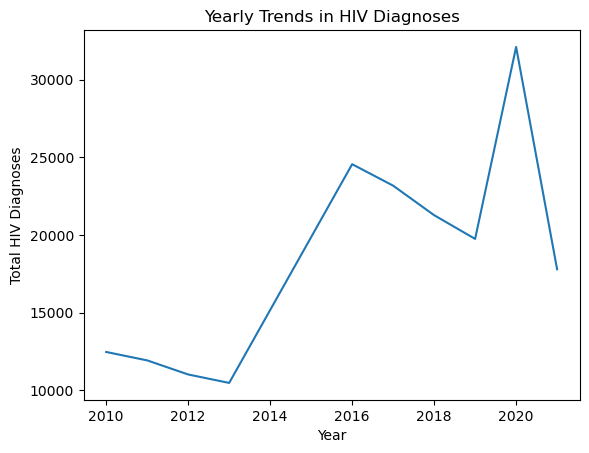

In [30]:
yearly_diagnoses.plot(kind='line', title='Yearly Trends in HIV Diagnoses')
plt.xlabel('Year')
plt.ylabel('Total HIV Diagnoses')
plt.show()

The line graph reveals the trend of HIV diagnoses from 2010 to 2021. An overall rise is noticeable until a peak around 2019, followed by a sharp decline in 2020. The reasons behind this significant drop could be multifactorial, including the impacts of new health policies, advances in preventive medicine, or external factors such as the global COVID-19 pandemic that may have affected testing and reporting.

Comparison of HIV Diagnoses by Borough

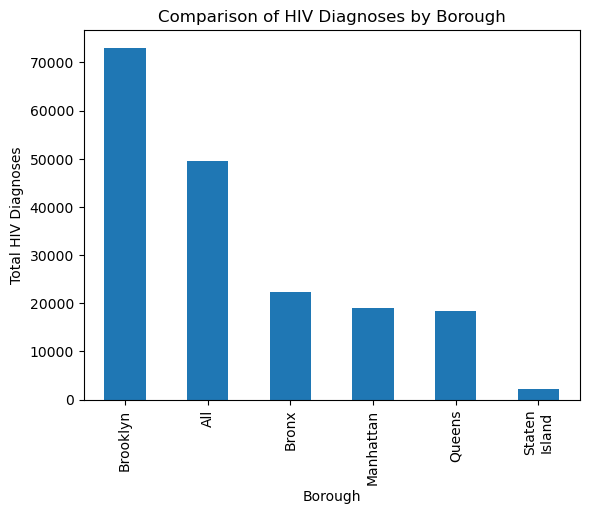

In [33]:
sorted_borough_diagnoses.plot(kind='bar', title='Comparison of HIV Diagnoses by Borough')
plt.xlabel('Borough')
plt.ylabel('Total HIV Diagnoses')
plt.show()

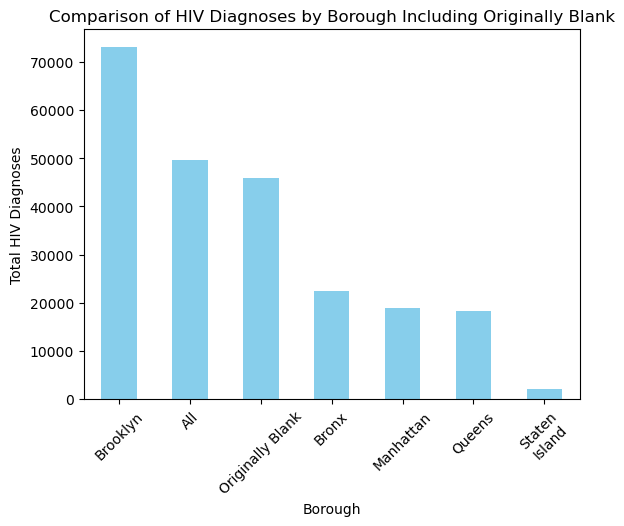

In [38]:
df_original = pd.read_csv(data_path, na_values="NA")
numeric_columns = ['TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
                   'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
                   'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
                   'TOTAL NUMBER OF AIDS DIAGNOSES', 'AIDS DIAGNOSES PER 100,000 POPULATION']
for col in numeric_columns:
    df_original[col] = pd.to_numeric(df_original[col], errors='coerce')
initial_row_count = df_original.shape[0]
df_original.dropna(subset=numeric_columns, inplace=True)
rows_dropped = initial_row_count - df_original.shape[0]
original_blanks_diagnoses = df_original[df_original['Borough'].isnull()]['TOTAL NUMBER OF HIV DIAGNOSES'].sum()
borough_diagnoses = df.groupby('Borough')['TOTAL NUMBER OF HIV DIAGNOSES'].sum()
borough_diagnoses['Originally Blank'] = original_blanks_diagnoses
sorted_borough_diagnoses = borough_diagnoses.sort_values(ascending=False)
sorted_borough_diagnoses.plot(kind='bar', color='skyblue', title='Comparison of HIV Diagnoses by Borough Including Originally Blank')
plt.xlabel('Borough')
plt.ylabel('Total HIV Diagnoses')
plt.xticks(rotation=45)
plt.show()

The first bar chart demonstrates the total HIV diagnoses across various boroughs. The highest number of diagnoses is seen in Brooklyn, followed by a combined total for all boroughs, which may include non-specific locations. This visualization helps identify boroughs with high rates of diagnoses and may suggest areas where public health interventions are most needed.

The second bar chart includes the data that was originally missing, labeled as 'Originally Blank' which was added to the modal borough 'Brooklyn' in the first bar chart. This addition emphasizes the volume of diagnoses that could not be attributed to a specific borough initially.

HIV Diagnosis Rates Across Different Races/Ethnicities

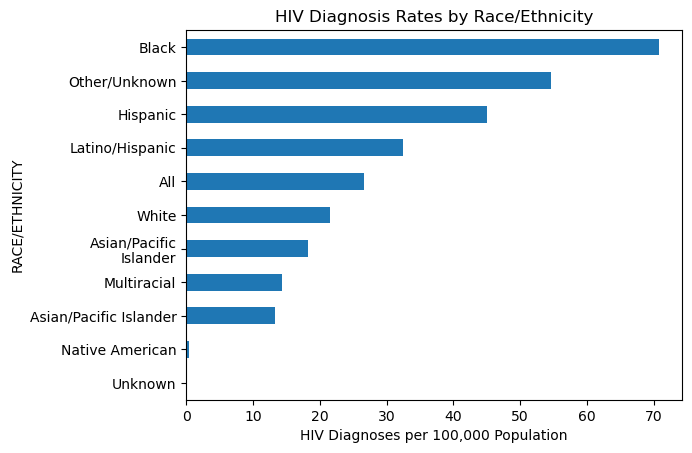

In [40]:
race_diagnosis_rate.sort_values().plot(kind='barh', title='HIV Diagnosis Rates by Race/Ethnicity')
plt.xlabel('HIV Diagnoses per 100,000 Population')
plt.show()

The horizontal bar chart ranks HIV diagnosis rates per 100,000 population by race/ethnicity. Notably, the Black community is most affected, followed by other or unknown races, and Hispanic individuals.

 Proportion of Concurrent HIV/AIDS Diagnoses

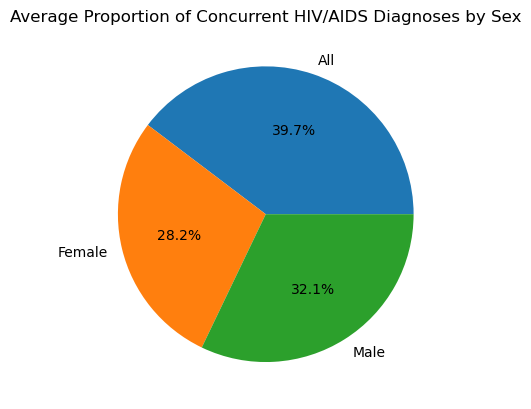

In [45]:
sex_concurrent_proportion.plot(kind='pie', title='Average Proportion of Concurrent HIV/AIDS Diagnoses by Sex', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

The pie chart depicts the average proportion of HIV diagnoses that were concurrently diagnosed with AIDS, stratified by sex. It shows a relatively even distribution among the categories, but notably, the 'All' category indicates instances where the sex was unspecified or inclusive of all groups. 

Trend of AIDS Diagnoses Over the Years

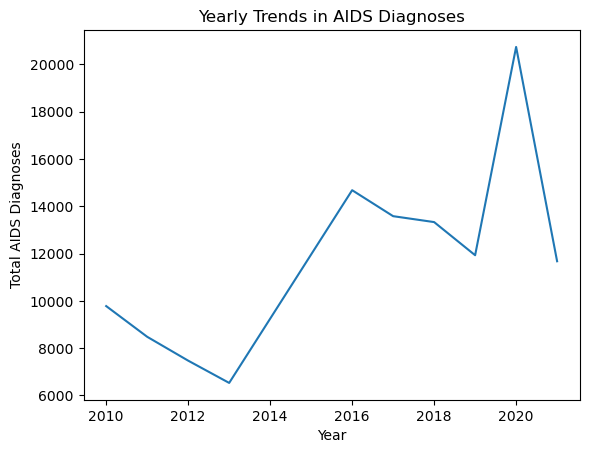

In [44]:
yearly_aids_diagnoses.plot(kind='line', title='Yearly Trends in AIDS Diagnoses')
plt.xlabel('Year')
plt.ylabel('Total AIDS Diagnoses')
plt.show()

The line graph tracks AIDS diagnoses from 2010 to 2021, showing fluctuations over the years with a peak similar to the HIV diagnoses trend. The peak in AIDS diagnoses may correlate with the peak in HIV diagnoses, given the progression of untreated HIV to AIDS. The drop in recent years could reflect improved HIV management or the same factors affecting the decline in new HIV diagnoses.